In [1]:
import os
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import math
from sklearn.metrics import r2_score, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [2]:
path="data"
tables_name=os.listdir(path)
print(tables_name)

['admissiondrug.csv.gz', 'admissionDx.csv.gz', 'allergy.csv.gz', 'apacheApsVar.csv.gz', 'apachePatientResult.csv.gz', 'apachePredVar.csv.gz', 'carePlanCareProvider.csv.gz', 'carePlanEOL.csv.gz', 'carePlanGeneral.csv.gz', 'carePlanGoal.csv.gz', 'carePlanInfectiousDisease.csv.gz', 'customLab.csv.gz', 'diagnosis.csv.gz', 'hospital.csv.gz', 'infusiondrug.csv.gz', 'intakeOutput.csv.gz', 'lab.csv.gz', 'medication.csv.gz', 'microLab.csv.gz', 'note.csv.gz', 'nurseAssessment.csv.gz', 'nurseCare.csv.gz', 'nurseCharting.csv.gz', 'pastHistory.csv.gz', 'patient.csv.gz', 'physicalExam.csv.gz', 'respiratoryCare.csv.gz', 'respiratoryCharting.csv.gz', 'treatment.csv.gz', 'vitalAperiodic.csv.gz', 'vitalPeriodic.csv.gz']


In [3]:
tables={}
for element in tables_name:
    tables[element[0:element.find(".csv")]]=pd.read_csv(path+"/"+element)

C:\Users\ruben\AppData\Local\Temp\ipykernel_2512\2727197083.py:3: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  tables[element[0:element.find(".csv")]]=pd.read_csv(path+"/"+element)


In [4]:
table_name=list(tables.keys())

In [5]:
def le(col):
    col_list=list(col)
    labels={}
    for i in range(len(col_list)):
        if col_list[i] in labels:
            next
        else:
            labels[col_list[i]]=len(labels)
    col=col.replace(labels)
    return col, labels

In [6]:
pat_ex=1335511
for element in table_name:
    try:
        tabla=tables[element]
        print("**{}**".format(element))
        display(tabla[tabla["patientunitstayid"]==pat_ex])
    except:
        next

**admissiondrug**


,admissiondrugid,patientunitstayid,drugoffset,drugenteredoffset,drugnotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,drugdosage,drugunit,drugadmitfrequency,drughiclseqno
540,4491057,1335511,4,47,Admission,eCM Primary,Nurse,False,True,TRUSOPT ...,0.0,,,9896
541,4491056,1335511,4,47,Admission,eCM Primary,Nurse,False,True,COLACE ...,0.0,,,1326
542,4491060,1335511,4,47,Admission,eCM Primary,Nurse,False,True,KLOR-CON ...,0.0,,,549
543,4491053,1335511,4,47,Admission,eCM Primary,Nurse,False,True,ASPIRIN ...,0.0,,,1794
544,4491059,1335511,4,47,Admission,eCM Primary,Nurse,False,True,LISINOPRIL ...,0.0,,,132
545,4491058,1335511,4,47,Admission,eCM Primary,Nurse,False,True,LASIX ...,0.0,,,3660
546,4491052,1335511,4,47,Admission,eCM Primary,Nurse,False,True,ALLOPURINOL ...,0.0,,,1100
547,4491054,1335511,4,47,Admission,eCM Primary,Nurse,False,True,CARVEDILOL ...,0.0,,,13795
548,4491061,1335511,4,47,Admission,eCM Primary,Nurse,False,True,SIMVASTATIN ...,0.0,,,6312
549,4491055,1335511,4,47,Admission,eCM Primary,Nurse,False,True,VITAMIN D3 ...,0.0,,,996


**admissionDx**


,admissiondxid,patientunitstayid,admitdxenteredoffset,admitdxpath,admitdxname,admitdxtext
4159,3905330,1335511,7,admission diagnosis|Was the patient admitted f...,No,No
4160,3905331,1335511,7,admission diagnosis|Non-operative Organ System...,Neurologic,Neurologic
4161,3905332,1335511,7,admission diagnosis|All Diagnosis|Non-operativ...,Encephalopathies (excluding hepatic),Encephalopathies (excluding hepatic)


**allergy**


,allergyid,patientunitstayid,allergyoffset,allergyenteredoffset,allergynotetype,specialtytype,usertype,rxincluded,writtenineicu,drugname,allergytype,allergyname,drughiclseqno


**apacheApsVar**


,apacheapsvarid,patientunitstayid,intubated,vent,dialysis,eyes,motor,verbal,meds,urine,...,ph,hematocrit,creatinine,albumin,pao2,pco2,bun,glucose,bilirubin,fio2
881,361981,1335511,0,0,0,2,5,2,0,138.8448,...,-1.0,37.8,0.73,3.1,-1.0,-1.0,17.0,81,1.9,-1


**apachePatientResult**


,apachepatientresultsid,patientunitstayid,physicianspeciality,physicianinterventioncategory,acutephysiologyscore,apachescore,apacheversion,predictedicumortality,actualicumortality,predictediculos,...,predictedhospitallos,actualhospitallos,preopmi,preopcardiaccath,ptcawithin24h,unabridgedunitlos,unabridgedhosplos,actualventdays,predventdays,unabridgedactualventdays
1450,1218801,1335511,hospitalist,II,48,65,IVa,0.040955,ALIVE,3.006643,...,9.660024,8.0049,0,0,0,3.6833,8.0049,NaN,NaN,NaN
1451,1218800,1335511,hospitalist,II,48,65,IV,0.047278,ALIVE,2.880550,...,8.770482,8.0049,0,0,0,3.6833,8.0049,NaN,NaN,NaN


**apachePredVar**


,apachepredvarid,patientunitstayid,sicuday,saps3day1,saps3today,saps3yesterday,gender,teachtype,region,bedcount,...,creatinine,dischargelocation,visitnumber,amilocation,day1meds,day1verbal,day1motor,day1eyes,day1pao2,day1fio2
881,287535,1335511,1,0,0,0,0,0,3,12,...,0.73,4,1,-1,0,2,5,2,-1.0,-1


**carePlanCareProvider**


,cplcareprovderid,patientunitstayid,careprovidersaveoffset,providertype,specialty,interventioncategory,managingphysician,activeupondischarge
3606,5177438,1335511,1899,NaN,hospitalist,II,Consulting,True
3607,5177439,1335511,1899,NaN,hospitalist,II,Managing,True
3608,5054127,1335511,7,NaN,hospitalist,II,Managing,False
3609,5177440,1335511,1899,NaN,pulmonary/CCM,I,Consulting,True


**carePlanEOL**


,cpleolid,patientunitstayid,cpleolsaveoffset,cpleoldiscussionoffset,activeupondischarge


**carePlanGeneral**


,cplgeneralid,patientunitstayid,activeupondischarge,cplitemoffset,cplgroup,cplitemvalue
31473,21849154,1335511,False,548,Activity,HOB 30 degrees
31474,21905505,1335511,True,4918,Safety/Restraints,Seizure
31475,21905503,1335511,True,4918,Safety/Restraints,Soft limb
31476,21905508,1335511,True,4918,Safety/Restraints,Fall prevention per policy
31477,21905507,1335511,True,4918,Safety/Restraints,Assess fall risk
31478,21905504,1335511,True,4918,Safety/Restraints,Fall
31479,21905509,1335511,True,4918,Safety/Restraints,Left wrist
31480,22020017,1335511,False,548,Analgesia,None
31481,22819108,1335511,True,4918,Activity,HOB 30 degrees
31482,21905510,1335511,True,4918,Safety/Restraints,Aspiration


**carePlanGoal**


,cplgoalid,patientunitstayid,cplgoaloffset,cplgoalcategory,cplgoalvalue,cplgoalstatus,activeupondischarge
2648,2244462,1335511,4230,Patient-Family,Patient/family demonstrate effective coping,Active,True
2649,2244463,1335511,4230,Patient-Family,Pain is controlled,Active,True
2650,2244461,1335511,4230,Nutrition/Skin,Patient nutritional needs met,Active,True
2651,2244467,1335511,4230,Cardiovascular,Vital signs within normal parameters,Active,True
2652,2303175,1335511,1613,Pulmonary,Absent adventitious breath sounds,Active,False
2653,2244465,1335511,4230,Pulmonary,Absent adventitious breath sounds,Active,True
2654,2303177,1335511,1613,Cardiovascular,Vital signs within normal parameters,Active,False
2655,2244468,1335511,4230,Neurologic,Neurologic status stable,Active,True
2656,2303178,1335511,1613,Neurologic,Neurologic status stable,Active,False
2657,2244466,1335511,4230,Pulmonary,Pulse oximetry within ordered parameters,Active,True


**carePlanInfectiousDisease**


,cplinfectid,patientunitstayid,activeupondischarge,cplinfectdiseaseoffset,infectdiseasesite,infectdiseaseassessment,responsetotherapy,treatment


**customLab**


,customlabid,patientunitstayid,labotheroffset,labothertypeid,labothername,labotherresult,labothervaluetext


**diagnosis**


,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
22803,17497765,1335511,True,4230,neurologic|altered mental status / pain|enceph...,"348.30, G93.40",Primary
22804,17630298,1335511,True,4230,renal|electrolyte imbalance|hypokalemia,"276.8, E87.6",Other
22805,18782541,1335511,False,2017,cardiovascular|ventricular disorders|congestiv...,"428.0, I50.9",Major
22806,18925392,1335511,True,4230,cardiovascular|arrhythmias|atrial fibrillation,"427.31, I48.0",Major
22807,17609675,1335511,False,1344,cardiovascular|vascular disorders|hypertension,"401.9, I10",Major
22808,18921247,1335511,False,1345,neurologic|altered mental status / pain|enceph...,"348.30, G93.40",Primary
22809,18084374,1335511,False,2017,cardiovascular|vascular disorders|hypertension,"401.9, I10",Major
22810,18970834,1335511,False,1344,cardiovascular|chest pain / ASHD|coronary arte...,NaN,Major
22811,17630840,1335511,True,4230,renal|electrolyte imbalance|hypomagnesemia,"275.2, E83.42",Other
22812,17966589,1335511,False,1344,neurologic|altered mental status / pain|enceph...,"348.30, G93.40",Primary


**hospital**
**infusiondrug**


,infusiondrugid,patientunitstayid,infusionoffset,drugname,drugrate,infusionrate,drugamount,volumeoffluid,patientweight


**intakeOutput**


,intakeoutputid,patientunitstayid,intakeoutputoffset,intaketotal,outputtotal,dialysistotal,nettotal,intakeoutputentryoffset,cellpath,celllabel,cellvaluenumeric,cellvaluetext
45480,84017486,1335511,6444,0.0,50.0,0.0,-50.0,6444,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,50.0,50.0
45547,84537075,1335511,9326,0.0,200.0,0.0,-200.0,9326,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,200.0,200.0
45555,84603802,1335511,10611,0.0,0.0,0.0,0.0,10611,flowsheet|Flowsheet Cell Labels|I&O|Weight|Bod...,Bodyweight (lb),62.3,62.3
45556,84603803,1335511,10611,0.0,0.0,0.0,0.0,10611,flowsheet|Flowsheet Cell Labels|I&O|Weight|Bod...,Bodyweight (kg),28.3,28.3
45604,85052958,1335511,6700,0.0,125.0,0.0,-125.0,6700,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,125.0,125.0
45626,85203506,1335511,5876,0.0,25.0,0.0,-25.0,5876,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,25.0,25.0
45649,85440740,1335511,5816,0.0,50.0,0.0,-50.0,5816,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,50.0,50.0
45677,85669785,1335511,6116,0.0,100.0,0.0,-100.0,6116,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,100.0,100.0
45701,85898988,1335511,7075,0.0,175.0,0.0,-175.0,7075,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,175.0,175.0
45711,85990793,1335511,10136,0.0,175.0,0.0,-175.0,10136,flowsheet|Flowsheet Cell Labels|I&O|Output (ml...,Urine,175.0,175.0


**lab**


,labid,patientunitstayid,labresultoffset,labtypeid,labname,labresult,labresulttext,labmeasurenamesystem,labmeasurenameinterface,labresultrevisedoffset
275002,335487996,1335511,4724,3,MCH,34.1,34.1,pg,pg,4724
275003,335486738,1335511,4724,3,-eos,3.8,3.8,%,%,4724
275004,335486739,1335511,4724,3,MCV,99.6,99.6,fL,fL,4724
275005,335487997,1335511,4724,3,-monos,10.8,10.8,%,%,4724
275006,335486740,1335511,4724,3,Hgb,13.1,13.1,g/dL,g/dL,4724
...,...,...,...,...,...,...,...,...,...,...
275204,329352447,1335511,3246,1,magnesium,2.1,2.1,mg/dL,mg/dL,3246
275205,336550984,1335511,817,4,bedside glucose,81.0,81,mg/dL,mg/dL,817
275206,330349953,1335511,-399,1,creatinine,0.7,0.7,mg/dL,mg/dL,-399
275207,328606561,1335511,3246,1,phosphate,1.9,1.9,mg/dL,mg/dL,3246


**medication**


,medicationid,patientunitstayid,drugorderoffset,drugstartoffset,drugivadmixture,drugordercancelled,drugname,drughiclseqno,dosage,routeadmin,frequency,loadingdose,prn,drugstopoffset,gtc
7010,46442532,1335511,5073,5081,No,No,hydrALAZINE,89.0,10 mg,IntraVENOUS,Every 4 hours PRN,NaN,Yes,11222,41
7011,47554897,1335511,2,-8,No,No,ondansetron,33598.0,4 mg,IntraVENOUS,Every 4 hours PRN,NaN,Yes,11222,65
7012,46542409,1335511,1102,1101,No,No,ipratropium-albuterol,9040.0,3 mL,Nebulization,Every 2 hours PRN,NaN,Yes,11222,14
7013,47272180,1335511,3527,3551,No,No,furosemide,3660.0,20 mg,IntraVENOUS,Daily,NaN,No,3897,56
7014,47567500,1335511,2656,3536,No,No,furosemide,3660.0,40 mg,Oral,Daily,NaN,No,3526,56
7015,46616800,1335511,3894,4976,No,No,furosemide,3660.0,40 mg,Oral,Daily,NaN,No,11222,56
7016,46890796,1335511,2656,3536,No,No,potassium chloride,549.0,20 mEq,Oral,Daily,NaN,No,11222,59
7017,47243676,1335511,2657,2816,No,No,NaN,6312.0,20 mg,Oral,Daily,NaN,No,11222,41
7018,45860888,1335511,2,-8,No,No,ondansetron,33598.0,4 mg,IntraVENOUS,Every 4 hours PRN,NaN,Yes,2224,65
7019,46948500,1335511,2653,2609,No,No,hydrALAZINE,89.0,10 mg,IntraVENOUS,Every 1 hour PRN,NaN,Yes,5068,41


**microLab**


,microlabid,patientunitstayid,culturetakenoffset,culturesite,organism,antibiotic,sensitivitylevel


**note**


,noteid,patientunitstayid,noteoffset,noteenteredoffset,notetype,notepath,notevalue,notetext
8944,30999365,1335511,4,47,Admission,notes/Progress Notes/Admission Page One/Source...,Medical Records,Medical Records
8945,30999366,1335511,4,47,Admission,notes/Progress Notes/Allergies / Preadmission ...,No,No
8946,30999367,1335511,4,47,Admission,notes/Progress Notes/Allergies / Preadmission ...,Yes,Yes
8947,30999368,1335511,4,47,Admission,notes/Progress Notes/Social History / Family H...,Performed,Performed
8948,30999369,1335511,4,47,Admission,notes/Progress Notes/Social History / Family H...,< 20 pack years - remote hx of smoking,< 20 pack years - remote hx of smoking
8949,30999370,1335511,4,47,Admission,notes/Progress Notes/Social History / Family H...,Unknown,Unknown
8950,30999376,1335511,4,47,Admission,notes/Progress Notes/Assessment and Plan/View ...,System View,SystemView
8951,30999377,1335511,4,47,Admission,notes/Shared/View and Save/Save Options/Print/...,Copies,1


**nurseAssessment**


,nurseassessid,patientunitstayid,nurseassessoffset,nurseassessentryoffset,cellattributepath,celllabel,cellattribute,cellattributevalue


**nurseCare**


,nursecareid,patientunitstayid,celllabel,nursecareoffset,nursecareentryoffset,cellattributepath,cellattribute,cellattributevalue


**nurseCharting**


,nursingchartid,patientunitstayid,nursingchartoffset,nursingchartentryoffset,nursingchartcelltypecat,nursingchartcelltypevallabel,nursingchartcelltypevalname,nursingchartvalue
598726,856495264,1335511,2606,2606,Vital Signs,Respiratory Rate,Respiratory Rate,19
598727,830621295,1335511,881,881,Vital Signs,Respiratory Rate,Respiratory Rate,19
598728,820761600,1335511,8476,8476,Vital Signs,O2 Saturation,O2 Saturation,96
598729,830321167,1335511,7566,7566,Vital Signs,Non-Invasive BP,Non-Invasive BP Systolic,170
598730,825939212,1335511,7822,7822,Vital Signs,Temperature,Temperature (C),37.2
...,...,...,...,...,...,...,...,...
600232,824635808,1335511,7076,7076,Scores,Glasgow coma score,GCS Total,13
600233,866302179,1335511,2606,2606,Vital Signs,Non-Invasive BP,Non-Invasive BP Diastolic,86
600234,822047795,1335511,2516,2516,Vital Signs,Non-Invasive BP,Non-Invasive BP Systolic,189
600235,865812333,1335511,1166,1166,Vital Signs,Non-Invasive BP,Non-Invasive BP Mean,122


**pastHistory**


,pasthistoryid,patientunitstayid,pasthistoryoffset,pasthistoryenteredoffset,pasthistorynotetype,pasthistorypath,pasthistoryvalue,pasthistoryvaluetext
4079,7436306,1335511,4,47,Admission,notes/Progress Notes/Past History/Organ System...,hypertension requiring treatment,hypertension requiring treatment
4080,7436305,1335511,4,47,Admission,notes/Progress Notes/Past History/Past History...,Performed,Performed
4081,7436308,1335511,4,47,Admission,notes/Progress Notes/Past History/Organ System...,CABG - date unknown,CABG - date unknown
4082,7436307,1335511,4,47,Admission,notes/Progress Notes/Past History/Organ System...,atrial fibrillation - chronic,atrial fibrillation - chronic


**patient**


,patientunitstayid,patienthealthsystemstayid,gender,age,ethnicity,hospitalid,wardid,apacheadmissiondx,admissionheight,hospitaladmittime24,...,unitadmitsource,unitvisitnumber,unitstaytype,admissionweight,dischargeweight,unitdischargetime24,unitdischargeoffset,unitdischargelocation,unitdischargestatus,uniquepid
1126,1335511,1016307,Male,84,Caucasian,226,556,Encephalopathies (excluding hepatic),167.6,21:58:43,...,Emergency Department,1,admit,63.0,28.3,21:28:00,5304,Floor,Alive,013-10232


**physicalExam**


,physicalexamid,patientunitstayid,physicalexamoffset,physicalexampath,physicalexamvalue,physicalexamtext
26693,49453064,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,scored,scored
26694,49453065,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,Performed - Structured,Performed - Structured
26695,49453066,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,HR Current,85
26696,49453067,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,HR Lowest,81
26697,49453068,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,HR Highest,85
26698,49453069,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,BP (systolic) Current,132
26699,49453070,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,BP (systolic) Lowest,112
26700,49453071,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,BP (systolic) Highest,132
26701,49453072,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,BP (diastolic) Current,88
26702,49453073,1335511,4,notes/Progress Notes/Physical Exam/Physical Ex...,BP (diastolic) Lowest,56


**respiratoryCare**


,respcareid,patientunitstayid,respcarestatusoffset,currenthistoryseqnum,airwaytype,airwaysize,airwayposition,cuffpressure,ventstartoffset,ventendoffset,...,peeplimit,cpaplimit,setapneainterval,setapneatv,setapneaippeephigh,setapnearr,setapneapeakflow,setapneainsptime,setapneaie,setapneafio2


**respiratoryCharting**


,respchartid,patientunitstayid,respchartoffset,respchartentryoffset,respcharttypecat,respchartvaluelabel,respchartvalue


**treatment**


,treatmentid,patientunitstayid,treatmentoffset,treatmentstring,activeupondischarge
16093,34861774,1335511,2017,pulmonary|ventilation and oxygenation|oxygen t...,False
16094,33319332,1335511,4230,neurologic|seizure therapy|anticonvulsant|leve...,True
16095,36810562,1335511,2742,cardiovascular|arrhythmias|anticoagulant admin...,False
16096,38616081,1335511,4230,pulmonary|radiologic procedures / bronchoscopy...,True
16097,36443406,1335511,2742,gastrointestinal|nutrition|enteral feeds|oral ...,False
...,...,...,...,...,...
16202,40022049,1335511,4230,cardiovascular|vascular disorders|VTE prophyla...,True
16203,38454377,1335511,4230,renal|medications|intravenous diuretic|IV furo...,True
16204,38347346,1335511,4230,endocrine|electrolyte correction|administratio...,True
16205,38330735,1335511,1344,pulmonary|ventilation and oxygenation|oxygen t...,False


**vitalAperiodic**


,vitalaperiodicid,patientunitstayid,observationoffset,noninvasivesystolic,noninvasivediastolic,noninvasivemean,paop,cardiacoutput,cardiacinput,svr,svri,pvr,pvri
103589,198479491,1335511,1436,142.0,82.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103590,198479583,1335511,3806,134.0,67.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103591,198479465,1335511,836,156.0,94.0,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103592,198479451,1335511,386,138.0,124.0,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103593,198479582,1335511,3776,130.0,74.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103771,198479618,1335511,4976,151.0,79.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103772,198479527,1335511,2486,142.0,90.0,95.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103773,198479575,1335511,3566,133.0,68.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103774,198479585,1335511,3866,148.0,88.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**vitalPeriodic**


,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
673054,830285045,1335511,5188,NaN,96.0,71.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673055,832003800,1335511,3743,NaN,96.0,82.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673056,830076442,1335511,1838,NaN,95.0,87.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673057,831367397,1335511,613,NaN,98.0,77.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
673058,830132246,1335511,2398,NaN,94.0,93.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674064,832006742,1335511,3913,NaN,96.0,78.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674065,831400186,1335511,973,NaN,94.0,74.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674066,832006700,1335511,3908,NaN,96.0,82.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
674067,831403896,1335511,1013,NaN,97.0,77.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def generate_data(tables):
    
    input_information = pd.merge(tables["patient"], tables["hospital"], on="hospitalid", how="left")
    input_information = input_information.drop('hospitalid', axis=1)
    
    inter_col = [0,2,3,4,6,7,10,16,18,21,28,29,30]
    dic_dics = {}
    ii1 = input_information.iloc[:,inter_col]
    col_types = ii1.dtypes.values
    for i in range(0,len(col_types)):
        tipe = col_types[i]
        if tipe=="O" and i!=2:
            ii1.iloc[:,i],dic_dics[ii1.iloc[:,i].name] = le(ii1.iloc[:,i])
    ii1["age"][ii1["age"]=="> 89"]=90
    
    usids = []
    allergies = []
    adm_drugs = []
    for i in range(0,len(input_information)):
        usid = input_information["patientunitstayid"][i]
        if len(tables["allergy"][tables["allergy"]["patientunitstayid"]==usid])>0:
            allergies.append(1)
        else:
            allergies.append(0)
        usids.append(usid)
        if len(tables["admissiondrug"][tables["admissiondrug"]["patientunitstayid"]==usid])>0:
            adm_drugs.append(len(np.unique(tables["admissiondrug"]["drughiclseqno"][tables["admissiondrug"]["patientunitstayid"]==usid])))
        else:
            adm_drugs.append(0)
    pres_allergy = pd.DataFrame()
    pres_allergy["patientunitstayid"] = usids
    pres_allergy["PresenceAllergy"] = allergies
    pres_adm_drug=pd.DataFrame()
    pres_adm_drug["patientunitstayid"] = usids
    pres_adm_drug["PresenceAdmDrug"] = adm_drugs
    ii1 = pd.merge(ii1, pres_allergy, on="patientunitstayid", how="left")
    ii1 = pd.merge(ii1, pres_adm_drug, on="patientunitstayid", how="left")
    
    apach = tables["apacheApsVar"][1:]
    ii1 = pd.merge(ii1, apach, on="patientunitstayid", how="left")

    
    usids=[]
    n_days=[]
    Apchr=tables["apachePatientResult"]
    cont=0
    for i in range(len(ii1)):
        id_ = ii1["patientunitstayid"][i]
        try:
            n_days.append(Apchr[Apchr["patientunitstayid"] == id_]["actualhospitallos"].iloc[0])
        except:
            n_days.append(np.nan)
        usids.append(id_)
    y_days=pd.DataFrame()
    y_days["patientunitstayid"]=usids
    y_days["UCIdays"]=n_days
    ii1 = pd.merge(ii1, y_days, on="patientunitstayid", how="left")
    
    treat=[]
    tr=tables["treatment"]
    for i in range(0,len(ii1)):
        usid=ii1["patientunitstayid"][i]
        if len(tr[tr["patientunitstayid"] == usid])>0:
            treat.append(len(tr[tr["patientunitstayid"] == usid]))
        else:
            treat.append(0)
    pres_treat=pd.DataFrame()
    pres_treat["patientunitstayid"]=usids
    pres_treat["treatment"]=treat
    ii1=pd.merge(ii1, pres_treat, on="patientunitstayid", how="left")

    
    return ii1


In [8]:
ii1=generate_data(tables)
ii1 = ii1[ii1['UCIdays'].notna()]
ii1 = ii1[ii1['treatment'].notna()]
ii1 = ii1.fillna(-1)

C:\Users\ruben\AppData\Local\Temp\ipykernel_2512\2956346087.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ii1.iloc[:,i],dic_dics[ii1.iloc[:,i].name] = le(ii1.iloc[:,i])
C:\Users\ruben\AppData\Local\Temp\ipykernel_2512\2956346087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ii1["age"][ii1["age"]=="> 89"]=90
C:\Users\ruben\AppData\Local\Temp\ipykernel_2512\2956346087.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

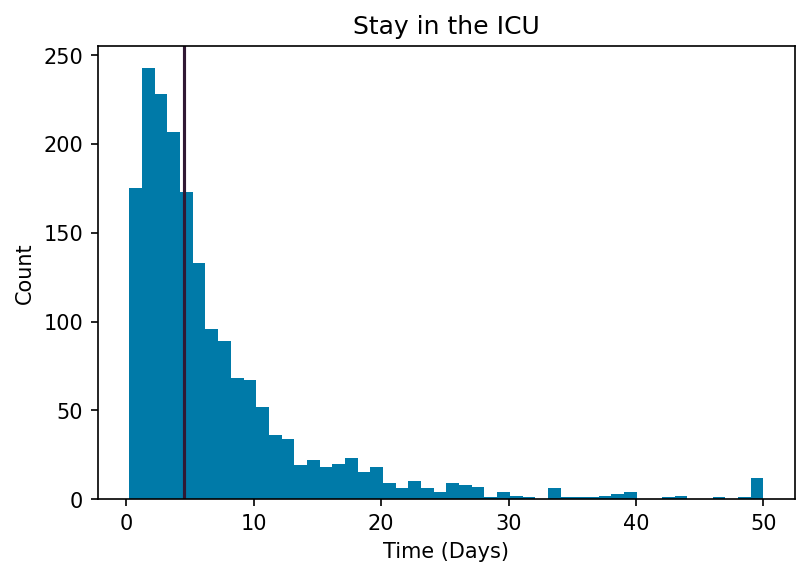

GMEAN:  4.5449795895940195


In [9]:
from scipy.stats import gmean
plt.figure(dpi=150)
plt.title("Stay in the ICU")
plt.hist(ii1['UCIdays'],bins=50,color="#007AA8")
plt.ylabel("Count")
plt.xlabel("Time (Days)")
plt.axvline(gmean(ii1['UCIdays']),color="#301934")
plt.show()
print("GMEAN: ",gmean(ii1['UCIdays']))

In [10]:
ii1["days_ranges"] = pd.cut(ii1["UCIdays"],bins=[0,5,np.max(ii1["UCIdays"])+1.0],right=False)
ii1["days_ranges"].value_counts()

[0.0, 5.0)     983
[5.0, 51.0)    855
Name: days_ranges, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x=ii1.drop(["UCIdays",'days_ranges',"treatment"],axis=1)
y,dic_out=le(ii1["days_ranges"])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.10)

In [12]:
param_grid = {'n_estimators': [1,50, 100, 200,500],'max_depth': [10, 50, 100],'bootstrap': [True, False]}
grid = GridSearchCV(RandomForestClassifier(random_state=1),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END .......bootstrap=True, max_depth=10, n_estimators=1; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END ......bootstrap=True, max_depth=10, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=True, max_depth=10, n_estimators=100; total time=   0.1s
[CV] END .....bootstrap=True, max_depth=10, n_e

[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.0s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.1s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.1s
[CV] END .....bootstrap=False, max_depth=50, n_estimators=50; total time=   0.1s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.2s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.2s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.2s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.2s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=100; total time=   0.2s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.5s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.5s
[CV] END ....bootstrap=False, max_depth=50, n_estimators=200; total time=   0.5s
[CV] END ....bootstrap=False

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_days = RandomForestClassifier(bootstrap=False, max_depth=10, n_estimators=150,random_state=1)
rf_days.fit(X_train, y_train)
y_train_preds = rf_days.predict(X_test)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       100
           1       0.68      0.68      0.68        84

    accuracy                           0.71       184
   macro avg       0.70      0.70      0.70       184
weighted avg       0.71      0.71      0.71       184



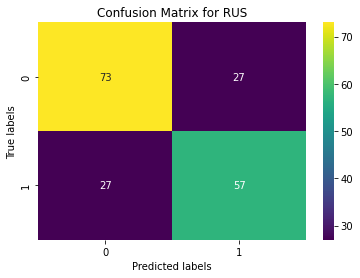

70.65217391304348


In [14]:
Y_pred = rf_days.predict(X_test.fillna(-1))
print(classification_report(y_test, Y_pred))
cm = confusion_matrix(y_test, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="viridis", fmt='.4g' )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for RUS')
ax.xaxis.set_ticklabels([0,1]); ax.yaxis.set_ticklabels([0,1])
plt.show()
print(accuracy_score(y_test, Y_pred)*100)

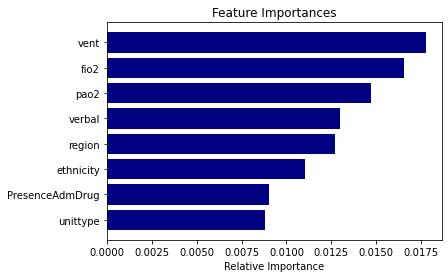

In [15]:
features = X_train.columns
importances = rf_days.feature_importances_ # Impurity-based feature importances
indices = np.argsort(importances) # Put feature with biggest importance at the top
plt.title('Feature Importances')
plt.barh(range(len(indices))[8:16], importances[indices][8:16], color='#000080')
plt.yticks(range(len(indices))[8:16], [features[i] for i in indices][8:16])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
ii1["treatment_bin"] = pd.cut(ii1["treatment"],bins=[0,5,np.max(ii1["treatment"])+1],right=False)
ii1["treatment_bin"].value_counts()

[5, 1669)    936
[0, 5)       902
Name: treatment_bin, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
x=ii1.drop(["UCIdays",'treatment_bin',"treatment","days_ranges"],axis=1)
y,dic_out2=le(ii1["treatment_bin"])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.10)

In [18]:
'''
param_grid = {'n_estimators': [1,50, 100, 200,500],'max_depth': [10, 50, 100],'bootstrap': [True, False]}
grid = GridSearchCV(RandomForestClassifier(random_state=1),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(grid.best_estimator_)
'''

"\nparam_grid = {'n_estimators': [1,50, 100, 200,500],'max_depth': [10, 50, 100],'bootstrap': [True, False]}\ngrid = GridSearchCV(RandomForestClassifier(random_state=1),param_grid,refit=True,verbose=2)\ngrid.fit(X_train,y_train)\nprint(grid.best_estimator_)\n"

In [25]:
#y = ii1["treatment_bin"]
#x = ii1.drop(["treatment","treatment_bin","UCIdays"],axis=1)
RR_def = RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=500,random_state=1)
RR_def.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=500,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69        83
           1       0.75      0.74      0.75       101

    accuracy                           0.72       184
   macro avg       0.72      0.72      0.72       184
weighted avg       0.72      0.72      0.72       184



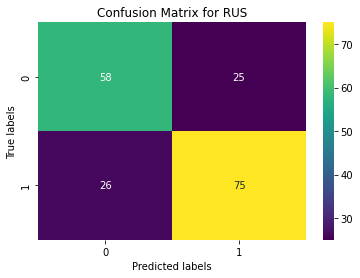

72.28260869565217


In [26]:
Y_pred = RR_def.predict(X_test.fillna(-1))
print(classification_report(y_test.fillna(0), Y_pred))
cm = confusion_matrix(y_test.fillna(0), Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="viridis", fmt='.4g' )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for RUS')
ax.xaxis.set_ticklabels([0,1]); ax.yaxis.set_ticklabels([0,1])
plt.show()
print(accuracy_score(y_test.fillna(0), Y_pred)*100)

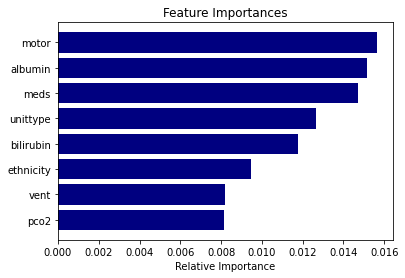

In [331]:
features = X_train.columns
importances = RR_def.feature_importances_ # Impurity-based feature importances
indices = np.argsort(importances) # Put feature with biggest importance at the top
plt.title('Feature Importances')
plt.barh(range(len(indices))[8:16], importances[indices][8:16], color='#000080')
plt.yticks(range(len(indices))[8:16], [features[i] for i in indices][8:16])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
ii1["treatment_pred"]=RR_def.predict(ii1.iloc[:,:-3].fillna(0))

In [32]:
ii1 = ii1[ii1['UCIdays'].notna()]
ii1["days_ranges"] = pd.cut(ii1["UCIdays"],bins=[0,5,np.max(ii1["UCIdays"])],right=False)

In [33]:
x=ii1.drop(["UCIdays",'days_ranges',"treatment","treatment_bin"],axis=1)
y,dic_out=le(ii1["days_ranges"])
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1,test_size=0.10)

In [45]:
RR_def = RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=500,random_state=1)
RR_def.fit(X_train.fillna(0), y_train.fillna(0))


RandomForestClassifier(bootstrap=False, max_depth=50, n_estimators=500,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       100
           1       0.68      0.75      0.72        84

    accuracy                           0.73       184
   macro avg       0.73      0.73      0.73       184
weighted avg       0.73      0.73      0.73       184



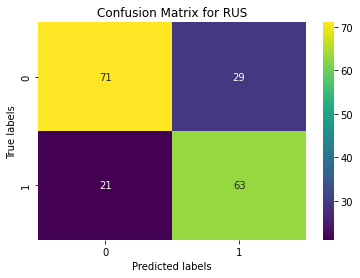

72.82608695652173


In [46]:
Y_pred = RR_def.predict(X_test.fillna(0))
print(classification_report(y_test.fillna(0), Y_pred))
cm = confusion_matrix(y_test.fillna(0), Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,cmap="viridis", fmt='.4g' )
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix for RUS')
ax.xaxis.set_ticklabels([0,1]); ax.yaxis.set_ticklabels([0,1])
plt.show()
print(accuracy_score(y_test.fillna(0), Y_pred)*100)